<h1> Packages import </h1>

In [2]:
#import all the necessary packages.
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import math
import time
import re
import random
import os
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity  
from sklearn.metrics import pairwise_distances
from matplotlib import gridspec
from scipy.sparse import hstack
import plotly
import plotly.figure_factory as ff
from plotly.graph_objs import Scatter, Layout

plotly.offline.init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")

### Data Import

In [2]:
from pprint import pprint
data = pd.read_json('tops_fashion.json')
print ('Nombre de data points : ', data.shape[0], \
       'Nombre de features/variables:', data.shape[1])

pprint(data.columns)
data

Number of data points :  183138 Number of features/variables: 19
Index(['sku', 'asin', 'product_type_name', 'formatted_price', 'author',
       'color', 'brand', 'publisher', 'availability', 'reviews',
       'large_image_url', 'availability_type', 'small_image_url',
       'editorial_review', 'title', 'model', 'medium_image_url',
       'manufacturer', 'editorial_reivew'],
      dtype='object')


,sku,asin,product_type_name,formatted_price,author,color,brand,publisher,availability,reviews,large_image_url,availability_type,small_image_url,editorial_review,title,model,medium_image_url,manufacturer,editorial_reivew
0,None,B016I2TS4W,SHIRT,None,None,None,FNC7C,None,None,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,Minions Como Superheroes Ironman Women's O Nec...,Minions Como Superheroes Ironman Long Sleeve R...,None,https://images-na.ssl-images-amazon.com/images...,None,NaN
1,None,B01N49AI08,SHIRT,None,None,None,FIG Clothing,None,None,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,Sizing runs on the small side. FIG® recommends...,FIG Clothing Womens Izo Tunic,None,https://images-na.ssl-images-amazon.com/images...,None,NaN
2,None,B01JDPCOHO,SHIRT,None,None,None,FIG Clothing,None,None,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,Sizing runs on the small side. FIG® recommends...,FIG Clothing Womens Won Top,None,https://images-na.ssl-images-amazon.com/images...,None,NaN
3,None,B01N19U5H5,SHIRT,None,None,None,Focal18,None,None,"[True, https://www.amazon.com/reviews/iframe?a...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,100% Brand New & Fashion<br> Quantity: 1 Piece...,Focal18 Sailor Collar Bubble Sleeve Blouse Shi...,None,https://images-na.ssl-images-amazon.com/images...,None,NaN
4,None,B004GSI2OS,SHIRT,$26.26,None,Onyx Black/ Stone,FeatherLite,None,Usually ships in 6-10 business days,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,now,https://images-na.ssl-images-amazon.com/images...,,Featherlite Ladies' Long Sleeve Stain Resistan...,None,https://images-na.ssl-images-amazon.com/images...,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183133,None,B01MSALTSO,OUTERWEAR,$14.58,None,Black,TOOGOO(R),None,Usually ships in 1-2 business days,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,now,https://images-na.ssl-images-amazon.com/images...,NaN,TOOGOO(R) Women's Tops Spring Autumn Casual Pu...,089106A4,https://images-na.ssl-images-amazon.com/images...,None,<b>* TOOGOO is a registered trademark. ONLY Au...
183134,None,B015W98YQK,SHIRT,None,None,Monochrome Plaid,VOGUE CODE,None,None,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,NaN,VOGUE CODE Vintage V Neck Plaid Shirt Sleevele...,None,https://images-na.ssl-images-amazon.com/images...,None,"SIZE CHART <p> XS for length of front 27.6""; l..."
183135,None,B075756PGC,SHIRT,None,None,Pink,Wrangler,None,None,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,NaN,Wrangler George Strait For Her Long Sleeve Pin...,LGS7089,https://images-na.ssl-images-amazon.com/images...,None,Pretty pink print button down Western shirt fr...
183136,None,B074L8FVTT,SHIRT,$44.99,None,Rose,susana monaco,susana monaco,Usually ships in 2-3 business days,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,now,https://images-na.ssl-images-amazon.com/images...,NaN,Susana Monaco Womens Susana Monoco Sleeveless ...,None,https://images-na.ssl-images-amazon.com/images...,susana monaco,Color/pattern: rose. Approximately 23in from s...


Sur ces 19 fonctionnalités, nous n’utiliserons que 6 dans ce projet.
<li>
    1. asin (numéro d’identification standard Amazon)
    2. brand (marque à laquelle le produit appartient)
    3. color (renseignements sur la couleur des vêtements, il peut contenir plusieurs couleurs comme valeur, p. ex., rayures rouges et noires) 
    4. product_type_name (type de l’apperal, ex : SHIRT/TSHIRT )
    5. medium_image_url  ( url de l’image )
    6. title (titre du produit)
    7. formated_price (prix du produit)

In [3]:
data = data[['asin', 'brand', 'color', 'medium_image_url', 'product_type_name', 'title', 'formatted_price']]
print ('Number of data points : ', data.shape[0], \
       'Number of features:', data.shape[1])
data.head()

Number of data points :  183138 Number of features: 7


,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
0,B016I2TS4W,FNC7C,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,Minions Como Superheroes Ironman Long Sleeve R...,None
1,B01N49AI08,FIG Clothing,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,FIG Clothing Womens Izo Tunic,None
2,B01JDPCOHO,FIG Clothing,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,FIG Clothing Womens Won Top,None
3,B01N19U5H5,Focal18,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,Focal18 Sailor Collar Bubble Sleeve Blouse Shi...,None
4,B004GSI2OS,FeatherLite,Onyx Black/ Stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,Featherlite Ladies' Long Sleeve Stain Resistan...,$26.26


# Data pre-processing

### Deleting null values

In [4]:
data = data.loc[~data['formatted_price'].isnull()]
print('Number of data points After eliminating price=NULL :', data.shape[0])

data =data.loc[~data['color'].isnull()]
print('Number of data points After eliminating color=NULL :', data.shape[0])


Number of data points After eliminating price=NULL : 28395
Number of data points After eliminating color=NULL : 28385


### Remove products with brief description

In [6]:
# Remove All products with very few words in title
data_sorted = data[data['title'].apply(lambda x: len(x.split())>4)]
print("After removal of products with short description:", data_sorted.shape[0])

After removal of products with short description: 27949


### Removing products with dual titles per sort 

<pre>
Titles 1:
16. woman's place is in the house and the senate shirts for Womens XXL White
17. woman's place is in the house and the senate shirts for Womens M Grey

Title 2:
25. tokidoki The Queen of Diamonds Women's Shirt X-Large
26. tokidoki The Queen of Diamonds Women's Shirt Small
27. tokidoki The Queen of Diamonds Women's Shirt Large

Title 3:
61. psychedelic colorful Howling Galaxy Wolf T-shirt/Colorful Rainbow Animal Print Head Shirt for woman Neon Wolf t-shirt
62. psychedelic colorful Howling Galaxy Wolf T-shirt/Colorful Rainbow Animal Print Head Shirt for woman Neon Wolf t-shirt
63. psychedelic colorful Howling Galaxy Wolf T-shirt/Colorful Rainbow Animal Print Head Shirt for woman Neon Wolf t-shirt
64. psychedelic colorful Howling Galaxy Wolf T-shirt/Colorful Rainbow Animal Print Head Shirt for woman Neon Wolf t-shirt
</pre>

In [7]:

print('The number of entries with duplicate title is %d'%sum(data.duplicated('title')))
# Sort the whole data based on title (alphabetical order of title) 
data_sorted.sort_values('title',inplace=True, ascending=False)

indices = []
for i,row in data_sorted.iterrows():
    indices.append(i)
import itertools
stage1_dedupe_asins = []
i = 0
j = 0
num_data_points = data_sorted.shape[0]
while i < num_data_points and j < num_data_points:    
    previous_i = i
    # store the list of words of ith string in a, ex: a = ['tokidoki', 'The', 'Queen', 'of', 'Diamonds', 'Women's', 'Shirt', 'X-Large']
    a = data['title'].loc[indices[i]].split()
    # search for the similar products sequentially 
    j = i+1
    while j < num_data_points:
        # store the list of words of jth string in b, ex: b = ['tokidoki', 'The', 'Queen', 'of', 'Diamonds', 'Women's', 'Shirt', 'Small']
        b = data['title'].loc[indices[j]].split()
        # store the maximum length of two strings
        length = max(len(a), len(b))
        # count is used to store the number of words that are matched in both strings
        count  = 0
        # itertools.zip_longest(a,b): will map the corresponding words in both strings, it will appened None in case of unequal strings
        # example: a =['a', 'b', 'c', 'd']
        # b = ['a', 'b', 'd']
        # itertools.zip_longest(a,b): will give [('a','a'), ('b','b'), ('c','d'), ('d', None)]
        for k in itertools.zip_longest(a,b): 
            if (k[0] == k[1]):
                count += 1
        # if the number of words in which both strings differ are > 2 , we are considering it as those two apperals are different
        # if the number of words in which both strings differ are < 2 , we are considering it as those two apperals are same, hence we are ignoring them
        if (length - count) > 2: # number of words in which both sensences differ
            # if both strings are differ by more than 2 words we include the 1st string index
            stage1_dedupe_asins.append(data_sorted['asin'].loc[indices[i]])
            # if the comaprision between is between num_data_points, num_data_points-1 strings and they differ in more than 2 words we include both
            if j == num_data_points-1: stage1_dedupe_asins.append(data_sorted['asin'].loc[indices[j]])
            # start searching for similar apperals corresponds 2nd string
            i = j
            break
        else:
            j += 1
    if previous_i == i:
        break

data = data.loc[data['asin'].isin(stage1_dedupe_asins)]
print('Number of data points now is: ', data.shape[0])

The number of entries with duplicate title is 2325
Number of data points now is:  17593


<pre>

In the previous cell, we sorted whole data in alphabetical order of  titles.Then, we removed titles which are adjacent and very similar title

But there are some products whose titles are not adjacent but very similar.

Examples:

Titles-1
86261.  UltraClub Women's Classic Wrinkle-Free Long Sleeve Oxford Shirt, Pink, XX-Large
115042. UltraClub Ladies Classic Wrinkle-Free Long-Sleeve Oxford Light Blue XXL

TItles-2
75004.  EVALY Women's Cool University Of UTAH 3/4 Sleeve Raglan Tee
109225. EVALY Women's Unique University Of UTAH 3/4 Sleeve Raglan Tees
120832. EVALY Women's New University Of UTAH 3/4-Sleeve Raglan Tshirt

</pre>

# Text Preprocessing

In [8]:

# we use the list of stop words that are downloaded from nltk lib.
stop_words = set(stopwords.words('english'))
print ('list of stop words:', stop_words)

def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        for words in total_text.split():
            # remove the special chars in review like '"#$@!%^&*()_+-~?>< etc.
            word = ("".join(e for e in words if e.isalnum()))
            # Conver all letters to lower-case
            word = word.lower()
            # stop-word removal
            if not word in stop_words:
                string += word + " "
        data[column][index] = string

list of stop words: {'will', 'been', 'wasn', 'because', 'nor', 'then', 'down', 'were', 'above', "isn't", 'being', 'it', 'you', "hadn't", 'wouldn', 'o', 'which', 'hers', "wouldn't", "haven't", 'out', "don't", 'up', 'hadn', "hasn't", 'him', 'than', 'and', 'between', 'my', 'do', 'they', "should've", 'mustn', 'i', 'here', "weren't", "you're", "wasn't", 'her', 'too', 'all', 'haven', 'just', 'more', "needn't", 'had', 'while', 'yourself', 'a', 'doesn', 'me', 'until', "that'll", 'before', 'its', "mightn't", 'is', 'but', 'ours', "it's", "you'll", 'shouldn', 'off', "aren't", 'm', 'over', 'any', 's', 'against', "you've", 'other', 'there', "couldn't", 'to', 'only', 'so', 'about', 'themselves', 'at', 'when', 'your', 'if', 'through', 'shan', 'few', 've', 'ain', 'some', 'does', 'ourselves', 'no', 'who', "you'd", 'did', 'isn', 'after', 'them', 'am', 'theirs', 'their', 'same', 'be', 'herself', 'by', 'both', 'these', 'we', 'where', 'this', 'those', 'ma', 'myself', 'was', 'didn', 'with', 'are', 'our', 't

In [9]:
data.head()

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
4,B004GSI2OS,FeatherLite,Onyx Black/ Stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,Featherlite Ladies' Long Sleeve Stain Resistan...,$26.26
6,B012YX2ZPI,HX-Kingdom Fashion T-shirts,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,Women's Unique 100% Cotton T - Special Olympic...,$9.99
15,B003BSRPB0,FeatherLite,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,FeatherLite Ladies' Moisture Free Mesh Sport S...,$20.54
27,B014ICEJ1Q,FNC7C,Purple,https://images-na.ssl-images-amazon.com/images...,SHIRT,Supernatural Chibis Sam Dean And Castiel O Nec...,$7.39
43,B0079BMKDS,FeatherLite,White,https://images-na.ssl-images-amazon.com/images...,APPAREL,Featherlite Ladies' Silky Smooth Pique (White)...,$13.53


In [10]:
data["digital"]=False

In [11]:
data['digital'] = data['digital'].astype('bool')

In [12]:
data['formatted_price']=data['formatted_price'].apply(lambda x: x.replace('$',''))

In [13]:
import sys
np.set_printoptions(threshold=sys.maxsize)

In [14]:
data.drop(data.loc[data['formatted_price']=='1,129.99'].index, inplace=True)

In [15]:
data.drop(data.loc[data['formatted_price']=="Too low to display"].index, inplace=True)

In [16]:
data['formatted_price'] = data['formatted_price'].astype('float')

In [17]:
data["color"] = data["color"].str.lower()

In [18]:
data.head()

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price,digital
4,B004GSI2OS,FeatherLite,onyx black/ stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,Featherlite Ladies' Long Sleeve Stain Resistan...,26.26,False
6,B012YX2ZPI,HX-Kingdom Fashion T-shirts,white,https://images-na.ssl-images-amazon.com/images...,SHIRT,Women's Unique 100% Cotton T - Special Olympic...,9.99,False
15,B003BSRPB0,FeatherLite,white,https://images-na.ssl-images-amazon.com/images...,SHIRT,FeatherLite Ladies' Moisture Free Mesh Sport S...,20.54,False
27,B014ICEJ1Q,FNC7C,purple,https://images-na.ssl-images-amazon.com/images...,SHIRT,Supernatural Chibis Sam Dean And Castiel O Nec...,7.39,False
43,B0079BMKDS,FeatherLite,white,https://images-na.ssl-images-amazon.com/images...,APPAREL,Featherlite Ladies' Silky Smooth Pique (White)...,13.53,False


In [3]:
#Adding gender column with Regex from title column 
def replace_gender(m):
    gender_men=["men","boy","man","guy"]
    match = [re.findall(c, m) for c in gender_men]
    match = list(filter(None, match))
    match = np.squeeze(np.array(match))
    match = np.squeeze(np.array(match))
    if match.size>0:    
        try:
            match = ",".join(match)
        except:
            return "men"
        finally:
            return "men"
    elif match.size==0:
        gender_women=["women","girl","ladi","lady"]
        match = [re.findall(c, m) for c in gender_women]
        match = list(filter(None, match))
        match = np.squeeze(np.array(match))
        match = np.squeeze(np.array(match))
        try:
            match = ",".join(match)
        except:
            return "women"
        finally:
            return "women"
    else:
        return "Unisex"

In [4]:
#Unity of colors with Regex 
def replace_colors(m):
    colors=["red", "grey","natural","multicol","red orange", "orange", "yellow","yellow green", "green", "sky blue", "blue", "violet", "brown", "black","purple","Berry",'Beige', "white", "gray", "magenta", "pink", "light blue", "aqua green", "jade green", "peach", "golden", 'navy',"yellow", "yellow orange", "mahogany", "tan" , "light brown"]
    match = [re.findall(c, m) for c in colors]
    match = list(filter(None, match))
    match = np.squeeze(np.array(match))
    match = np.squeeze(np.array(match))
    if match.size>0:    
        try:
            match = ",".join(match)
        except:
            return match
        finally:
            return match
    else:
        match = random.choice(colors)
        return match

In [24]:
data["color"] = data["color"].apply(lambda x: replace_colors(x))

In [25]:
start_time = time.time()
# we take each title and we text-preprocess it.
for index, row in data.iterrows():
    nlp_preprocessing(row['title'], index, 'title')
# we print the time it took to preprocess whole titles 
print(time.time() - start_time, "seconds")



16.558417797088623 seconds


In [26]:
data['brand'] = data['brand'].astype(str)

In [27]:
data.drop(data.loc[data['brand']=="None"].index, inplace=True)

In [28]:
start_time = time.time()
# we take each title and we text-preprocess it.
for index, row in data.iterrows():
    nlp_preprocessing(row['brand'], index, 'brand')
# we print the time it took to preprocess whole titles 
print(time.time() - start_time, "seconds")

data.head()


17.81676411628723 seconds


,asin,brand,color,medium_image_url,product_type_name,title,formatted_price,digital
4,B004GSI2OS,featherlite,black,https://images-na.ssl-images-amazon.com/images...,SHIRT,featherlite ladies long sleeve stain resistant...,26.26,False
6,B012YX2ZPI,hxkingdom fashion tshirts,white,https://images-na.ssl-images-amazon.com/images...,SHIRT,womens unique 100 cotton special olympics wor...,9.99,False
15,B003BSRPB0,featherlite,white,https://images-na.ssl-images-amazon.com/images...,SHIRT,featherlite ladies moisture free mesh sport sh...,20.54,False
27,B014ICEJ1Q,fnc7c,purple,https://images-na.ssl-images-amazon.com/images...,SHIRT,supernatural chibis sam dean castiel neck tshi...,7.39,False
43,B0079BMKDS,featherlite,white,https://images-na.ssl-images-amazon.com/images...,APPAREL,featherlite ladies silky smooth pique white xl,13.53,False


In [29]:
data.reset_index(inplace=True)

In [30]:
data.head(10)

,index,asin,brand,color,medium_image_url,product_type_name,title,formatted_price,digital
0,4,B004GSI2OS,featherlite,black,https://images-na.ssl-images-amazon.com/images...,SHIRT,featherlite ladies long sleeve stain resistant...,26.26,False
1,6,B012YX2ZPI,hxkingdom fashion tshirts,white,https://images-na.ssl-images-amazon.com/images...,SHIRT,womens unique 100 cotton special olympics wor...,9.99,False
2,15,B003BSRPB0,featherlite,white,https://images-na.ssl-images-amazon.com/images...,SHIRT,featherlite ladies moisture free mesh sport sh...,20.54,False
3,27,B014ICEJ1Q,fnc7c,purple,https://images-na.ssl-images-amazon.com/images...,SHIRT,supernatural chibis sam dean castiel neck tshi...,7.39,False
4,43,B0079BMKDS,featherlite,white,https://images-na.ssl-images-amazon.com/images...,APPAREL,featherlite ladies silky smooth pique white xl,13.53,False
5,46,B01NACPBG2,fifth degree,black,https://images-na.ssl-images-amazon.com/images...,SHIRT,fifth degree womens gold foil graphic tees jun...,6.95,False
6,50,B00480IRZS,finebrandshop,green,https://images-na.ssl-images-amazon.com/images...,SHIRT,ladies green seamless ribbed diamond patterned...,7.90,False
7,60,B014ICB9A0,fnc7c,black,https://images-na.ssl-images-amazon.com/images...,APPAREL,supernatural chibis sam dean castiel neck shir...,7.39,False
8,78,B011YPK0MW,feel piece,navy,https://images-na.ssl-images-amazon.com/images...,SHIRT,feel piece sami dip dye top one size navy,72.40,False
9,95,B0079QXJ3S,finebrandshop,Berry,https://images-na.ssl-images-amazon.com/images...,SHIRT,ladies fuchsia pink seamless stone set tube top,7.50,False


In [31]:
data.drop("index",axis=1,inplace=True)

In [32]:
data['color'] = data['color'].astype(str)

In [33]:
def convrt_remove_dup(x):
    x =x.split(",")
    x = list(dict.fromkeys(x))
    x = ",".join(x)
    return x

In [34]:
data["color"] = data["color"].apply(lambda x: convrt_remove_dup(x))

In [35]:
data['color'] = data['color'].astype(str)

In [36]:
len(data["color"].unique())

257

In [37]:
pd.set_option("display.max_colwidth", -1)

In [38]:
data.index[data['asin'] == 'B01MYPBEKQ'].tolist()

[16489]

In [39]:
data["medium_image_url"].describe()

count     17540                                                                   
unique    16350                                                                   
top       https://images-na.ssl-images-amazon.com/images/I/31Q7YxzFkEL._SL160_.jpg
freq      11                                                                      
Name: medium_image_url, dtype: object

In [40]:
data.iloc[[16528]]["medium_image_url"][:]

16528    https://images-na.ssl-images-amazon.com/images/I/41oqd22nCmL._SL160_.jpg
Name: medium_image_url, dtype: object

In [41]:
data.drop([9132, 11131,4629,12074, 13908,13373,5549,4060,13579,15783,16517],axis=0,inplace=True)

In [42]:
data.drop_duplicates(subset='medium_image_url', keep="last",inplace=True)

In [43]:
data = data[data['brand'].notna()]

In [44]:
data.reset_index(inplace=True)

In [45]:
import os
cwd = os.getcwd()
cwd+"\\final.csv"

'C:\\Users\\Dragox.RS\\Desktop\\Study_Project\\Apparel-Recommendation-master\\final.csv'

In [46]:
df=pd.read_csv("final.csv")

In [47]:
df.drop(["Unnamed: 0","level_0"],axis=1,inplace=True)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16315 entries, 0 to 16314
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              16315 non-null  int64  
 1   asin               16315 non-null  object 
 2   brand              16315 non-null  object 
 3   color              16315 non-null  object 
 4   medium_image_url   16315 non-null  object 
 5   product_type_name  16315 non-null  object 
 6   title              16315 non-null  object 
 7   formatted_price    16315 non-null  float64
 8   digital            16315 non-null  bool   
dtypes: bool(1), float64(1), int64(1), object(6)
memory usage: 1.0+ MB


In [49]:
df

,index,asin,brand,color,medium_image_url,product_type_name,title,formatted_price,digital
0,2,B003BSRPB0,featherlite,white,https://images-na.ssl-images-amazon.com/images/I/41dCf%2BplpCL._SL160_.jpg,SHIRT,featherlite ladies moisture free mesh sport shirt white xxxlarge,20.54,False
1,3,B014ICEJ1Q,fnc7c,purple,https://images-na.ssl-images-amazon.com/images/I/41Cn7jZ3O9L._SL160_.jpg,SHIRT,supernatural chibis sam dean castiel neck tshirts female purple l,7.39,False
2,4,B0079BMKDS,featherlite,white,https://images-na.ssl-images-amazon.com/images/I/31%2BYSWGczhL._SL160_.jpg,APPAREL,featherlite ladies silky smooth pique white xl,13.53,False
3,5,B01NACPBG2,fifth degree,black,https://images-na.ssl-images-amazon.com/images/I/51CrsFle7%2BL._SL160_.jpg,SHIRT,fifth degree womens gold foil graphic tees junior top short sleeve printed shirt l,6.95,False
4,6,B00480IRZS,finebrandshop,green,https://images-na.ssl-images-amazon.com/images/I/41ieEs4wqnL._SL160_.jpg,SHIRT,ladies green seamless ribbed diamond patterned cap sleeve top wide vneck,7.90,False
...,...,...,...,...,...,...,...,...,...
16310,17535,B01MRV2IFS,yuelian,black,https://images-na.ssl-images-amazon.com/images/I/41%2BtEUMOzUL._SL160_.jpg,SHIRT,yuelian womens chiffon short sleeves sun protection outerwear blouse,19.25,False
16311,17536,B01LY4QWLF,vintage america,white,https://images-na.ssl-images-amazon.com/images/I/41IGij8dDqL._SL160_.jpg,SHIRT,vintage america womens large lace collared blouse white l,23.24,False
16312,17537,B07167SCNH,tart collections,black,https://images-na.ssl-images-amazon.com/images/I/41Im-mnGE%2BL._SL160_.jpg,SHIRT,tart womens collections ann wrap top xs black,29.99,False
16313,17538,B07575N2WX,soprano,gray,https://images-na.ssl-images-amazon.com/images/I/41WRn2M14JL._SL160_.jpg,SHIRT,soprano womens small tiefringe slubknit tank top gray,22.83,False


In [50]:
df.reset_index(inplace=True)

In [51]:
df = df.rename(columns={'index':'id'})

In [218]:
df.drop('index',axis=1,inplace=True)

In [222]:
df.rename(columns={"level_0": "id"},inplace=True)

DATA Connection

In [224]:
import sqlite3

In [225]:
conn = sqlite3.connect('db.sqlite3')

In [226]:
c = conn.cursor()

In [227]:
c.execute('CREATE TABLE IF NOT EXISTS store_product (id integer, asin text,brand text,color text,medium_image_url text,product_type_name text,title text, formatted_price float, digital boolean)')

conn.commit()

In [228]:
df.to_sql('store_product', conn, if_exists='replace', index = False)

In [229]:
conn.close()

In [230]:
df.to_csv("finalx.csv")

DATA EXTRACT

In [60]:
from sqlalchemy import create_engine

cnx = create_engine('sqlite:///db.sqlite3').connect()

dataframe_store_product = pd.read_sql_table('store_product', cnx)
dataframe_store_product

,level_0,id,asin,brand,color,medium_image_url,product_type_name,title,formatted_price,digital
0,0,2,B003BSRPB0,featherlite,white,https://images-na.ssl-images-amazon.com/images/I/41dCf%2BplpCL._SL160_.jpg,SHIRT,featherlite ladies moisture free mesh sport shirt white xxxlarge,20.54,0
1,1,3,B014ICEJ1Q,fnc7c,purple,https://images-na.ssl-images-amazon.com/images/I/41Cn7jZ3O9L._SL160_.jpg,SHIRT,supernatural chibis sam dean castiel neck tshirts female purple l,7.39,0
2,2,4,B0079BMKDS,featherlite,white,https://images-na.ssl-images-amazon.com/images/I/31%2BYSWGczhL._SL160_.jpg,APPAREL,featherlite ladies silky smooth pique white xl,13.53,0
3,3,5,B01NACPBG2,fifth degree,black,https://images-na.ssl-images-amazon.com/images/I/51CrsFle7%2BL._SL160_.jpg,SHIRT,fifth degree womens gold foil graphic tees junior top short sleeve printed shirt l,6.95,0
4,4,6,B00480IRZS,finebrandshop,green,https://images-na.ssl-images-amazon.com/images/I/41ieEs4wqnL._SL160_.jpg,SHIRT,ladies green seamless ribbed diamond patterned cap sleeve top wide vneck,7.90,0
...,...,...,...,...,...,...,...,...,...,...
16310,16310,17535,B01MRV2IFS,yuelian,black,https://images-na.ssl-images-amazon.com/images/I/41%2BtEUMOzUL._SL160_.jpg,SHIRT,yuelian womens chiffon short sleeves sun protection outerwear blouse,19.25,0
16311,16311,17536,B01LY4QWLF,vintage america,white,https://images-na.ssl-images-amazon.com/images/I/41IGij8dDqL._SL160_.jpg,SHIRT,vintage america womens large lace collared blouse white l,23.24,0
16312,16312,17537,B07167SCNH,tart collections,black,https://images-na.ssl-images-amazon.com/images/I/41Im-mnGE%2BL._SL160_.jpg,SHIRT,tart womens collections ann wrap top xs black,29.99,0
16313,16313,17538,B07575N2WX,soprano,gray,https://images-na.ssl-images-amazon.com/images/I/41WRn2M14JL._SL160_.jpg,SHIRT,soprano womens small tiefringe slubknit tank top gray,22.83,0


In [61]:
# Utility Functions

#Display an image
def display_img(url,ax,fig):
    # we get the url of the apparel and download it
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    # we will display it in notebook 
    plt.imshow(img)

#plotting code to understand the decision  
def plot_heatmap(keys, values, labels, url, text):
        # keys: list of words of recommended title
        # values: len(values) ==  len(keys), values(i) represents the occurence of the word keys(i)
        # labels: len(labels) == len(keys), the values of labels depends on the model we are using
                # if model == 'bag of words': labels(i) = values(i)
                # if model == 'tfidf weighted bag of words':labels(i) = tfidf(keys(i))
                # if model == 'idf weighted bag of words':labels(i) = idf(keys(i))
        # url : apparel's url
        # we will devide the whole figure into two parts
        gs = gridspec.GridSpec(2, 2, width_ratios=[4,1], height_ratios=[4,1]) 
        fig = plt.figure(figsize=(25,3))
        
        # 1st, ploting heat map that represents the count of commonly ocurred words in title2
        ax = plt.subplot(gs[0])
        # it displays a cell in white color if the word is intersection(lis of words of title1 and list of words of title2), in black if not
        ax = sns.heatmap(np.array([values]), annot=np.array([labels]))
        ax.set_xticklabels(keys) # set that axis labels as the words of title
        ax.set_title(text) # apparel title
        
        # 2nd, plotting image of the the apparel
        ax = plt.subplot(gs[1])
        # we don't want any grid lines for image and no labels on x-axis and y-axis
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
        
        # we call dispaly_img based with paramete url
        display_img(url, ax, fig)
        
        # displays combine figure ( heat map and image together)
        plt.show()
    
def plot_heatmap_image(doc_id, vec1, vec2, url, text, model):
    # doc_id : index of the title1
    # vec1 : input apparels's vector, it is of a dict type {word:count}
    # vec2 : recommended apparels's vector, it is of a dict type {word:count}
    # url : apparels image url
    # text: title of recomonded apparel (used to keep title of image)
    # model, it can be any of the models, 
        # 1. bag_of_words
        # 2. tfidf
        # 3. idf
    # we find the common words in both titles, because these only words contribute to the distance between two title vec's
    intersection = set(vec1.keys()) & set(vec2.keys()) 
    # we set the values of non intersecting words to zero, this is just to show the difference in heatmap
    for i in vec2:
        if i not in intersection:
            vec2[i]=0
    # for labeling heatmap, keys contains list of all words in title2
    keys = list(vec2.keys())
    #  if ith word in intersection(lis of words of title1 and list of words of title2): values(i)=count of that word in title2 else values(i)=0 
    values = [vec2[x] for x in vec2.keys()]    
    # labels: len(labels) == len(keys), the values of labels depends on the model we are using
        # if model == 'bag of words': labels(i) = values(i)
        # if model == 'tfidf weighted bag of words':labels(i) = tfidf(keys(i))
        # if model == 'idf weighted bag of words':labels(i) = idf(keys(i))
    if model == 'bag_of_words':
        labels = values
    elif model == 'tfidf':
        labels = []
        for x in vec2.keys():
            # tfidf_title_vectorizer.vocabulary_ it contains all the words in the corpus
            # tfidf_title_features[doc_id, index_of_word_in_corpus] will give the tfidf value of word in given document (doc_id)
            if x in  tfidf_title_vectorizer.vocabulary_:
                labels.append(tfidf_title_features[doc_id, tfidf_title_vectorizer.vocabulary_[x]])
            else:
                labels.append(0)
    elif model == 'idf':
        labels = []
        for x in vec2.keys():
            # idf_title_vectorizer.vocabulary_ it contains all the words in the corpus
            # idf_title_features[doc_id, index_of_word_in_corpus] will give the idf value of word in given document (doc_id)
            if x in  idf_title_vectorizer.vocabulary_:
                labels.append(idf_title_features[doc_id, idf_title_vectorizer.vocabulary_[x]])
            else:
                labels.append(0)
    plot_heatmap(keys, values, labels, url, text)

# this function gets a list of wrods along with the frequency of each word given "text"
def text_to_vector(text):
    word = re.compile(r'\w+')
    words = word.findall(text)
    # words stores list of all words in given string, you can try 'words = text.split()' 
    #this will also gives same result
    return Counter(words) # Counter counts the occurence of each word in list, 
    #it returns dict type object {word1:count}

def get_result(doc_id, content_a, content_b, url, model):
    text1 = content_a
    text2 = content_b    
    # vector1 = dict{word11:#count, word12:#count, etc.}
    vector1 = text_to_vector(text1)
    # vector1 = dict{word21:#count, word22:#count, etc.}
    vector2 = text_to_vector(text2)
    plot_heatmap_image(doc_id, vector1, vector2, url, text2, model)

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
from nltk.stem.snowball import SnowballStemmer
import nltk
stemmer = SnowballStemmer("english")

In [63]:
def clean_tokenize(document):
    document = re.sub('[^\w_\s-]', ' ',document)       #remove punctuation marks and other symbols
    tokens = nltk.word_tokenize(document)              #Tokenize sentences
    cleaned_article = ' '.join([stemmer.stem(item) for item in tokens])    #Stemming each token
    return cleaned_article

In [67]:
import gensim.downloader

In [68]:
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


<h3> GLOBAL Model returing only ASIN"s </h3>

In [69]:
idf_title_vectorizer = CountVectorizer()
idf_title_features = idf_title_vectorizer.fit_transform(data['title'])

def n_containing(word):
    # return the number of documents which had the given word
    return sum(1 for blob in data['title'] if word in blob.split())

def idf(word):
    # idf = log(#number of docs / #number of docs which had the given word)
    return math.log(data.shape[0] / (n_containing(word)))

idf_euclidean=[]
def idf_model(doc_id, num_results):
    M=[]
    pairwise_dist = pairwise_distances(idf_title_features,idf_title_features[doc_id])

    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    df_indices = list(data.index[indices])

    for i in range(0,len(indices)):

        M.append(data['asin'].loc[df_indices[i]])

    return M

tfidf_title_vectorizer = TfidfVectorizer(min_df = 0)
tfidf_title_features = tfidf_title_vectorizer.fit_transform(data['title'])
tf_idf_euclidean=[]
def tfidf_model(doc_id, num_results):

    L=[]
    pairwise_dist = pairwise_distances(tfidf_title_features,tfidf_title_features[doc_id])

    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    df_indices = list(data.index[indices])
    for i in range(0,len(indices)):
        L.append(data['asin'].loc[df_indices[i]])
    return L

title_vectorizer = CountVectorizer()
title_features   = title_vectorizer.fit_transform(data['title'])
title_features.get_shape()
bag_of_words_euclidean=[]
def bag_of_words_model(doc_id, num_results):

    B=[]
    pairwise_dist = pairwise_distances(title_features,title_features[doc_id])
    
    # np.argsort will return indices of the smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    #data frame indices of the 9 smallest distace's
    df_indices = list(data.index[indices])
    
    for i in range(0,len(indices)):

        B.append(data['asin'].loc[df_indices[i]])

    return B

def global_model(doc_id,num_results):
    G= bag_of_words_model(doc_id,num_results) + tfidf_model(doc_id,num_results) + idf_model(doc_id,num_results)
    G = list(dict.fromkeys(G))
    return G
    

## 1.Bag of Words model on Product Titles and color

In [73]:
title_vectorizer = CountVectorizer()
color_features   = title_vectorizer.fit_transform(df['color'])
title_features   = title_vectorizer.fit_transform(df['title'])



title_features.get_shape() # get number of rows and columns in feature matrix.
# title_features.shape = #data_points * #words_in_corpus
# CountVectorizer().fit_transform(corpus) returns 
# the a sparase matrix of dimensions #data_points * #words_in_corpus
bag_of_words_euclidean=[]
def bag_of_words_model(doc_id, num_results):
    # doc_id: apparel's id in given corpus
    # pairwise_dist will store the distance from given input apparel to all remaining apparels
    # the metric we used here is cosine, the coside distance is mesured as K(X, Y) = <X, Y> / (||X||*||Y||)
    pairwise_dist = pairwise_distances(title_features,title_features[doc_id]) + pairwise_distances(color_features,color_features[doc_id])
    
    # np.argsort will return indices of the smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    #data frame indices of the 9 smallest distace's
    df_indices = list(df.index[indices])
    
    for i in range(0,len(indices)):
        # we will pass 1. doc_id, 2. title1, 3. title2, url, model
        get_result(indices[i],df['title'].loc[df_indices[0]], df['title'].loc[df_indices[i]], df['medium_image_url'].loc[df_indices[i]], 'bag_of_words')
        print('ASIN :',df['asin'].loc[df_indices[i]])
        print ('Brand:', df['brand'].loc[df_indices[i]])
        print ('Title:', df['title'].loc[df_indices[i]])
        bag_of_words_euclidean.append(pdists[i])
        print ('Euclidean similarity with the query image :', pdists[i])
        print('='*60)
    print('Average euclidean distance is ',sum(bag_of_words_euclidean)/num_results)



Getting the similar items for document id and number of items


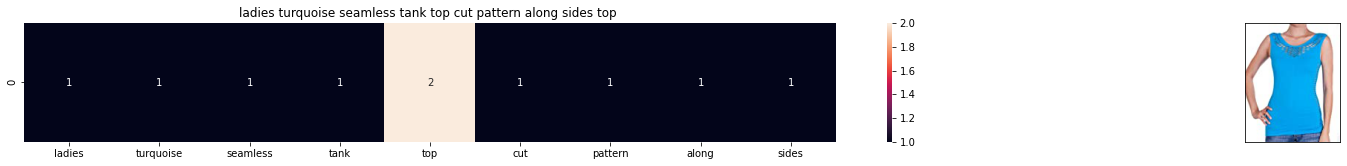

ASIN : B004TUJ7GK
Brand: finebrandshop 
Title: ladies turquoise seamless tank top cut pattern along sides top 
Euclidean similarity with the query image : 0.0


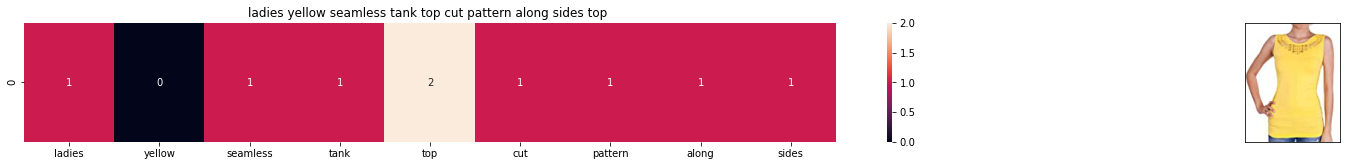

ASIN : B004TUD76Q
Brand: finebrandshop 
Title: ladies yellow seamless tank top cut pattern along sides top 
Euclidean similarity with the query image : 1.4142135623730951


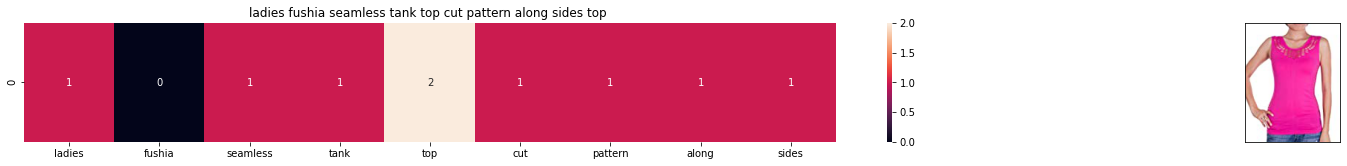

ASIN : B004TUJ6MA
Brand: finebrandshop 
Title: ladies fushia seamless tank top cut pattern along sides top 
Euclidean similarity with the query image : 2.414213562373095


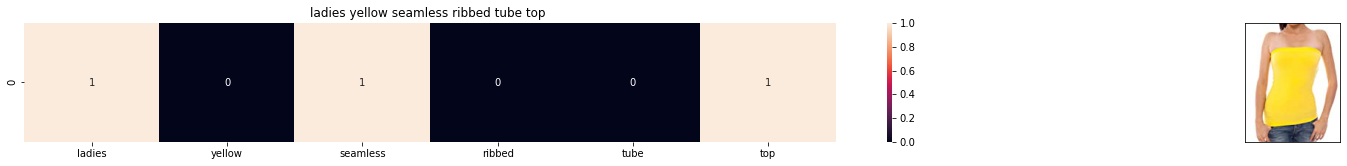

ASIN : B009286MFS
Brand: finebrandshop 
Title: ladies yellow seamless ribbed tube top 
Euclidean similarity with the query image : 3.1622776601683795


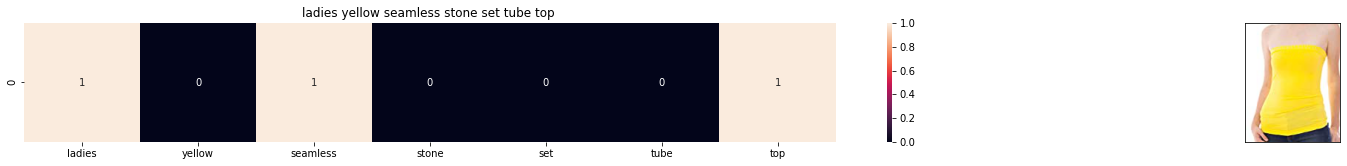

ASIN : B00D01CGU8
Brand: finebrandshop 
Title: ladies yellow seamless stone set tube top 
Euclidean similarity with the query image : 3.3166247903554


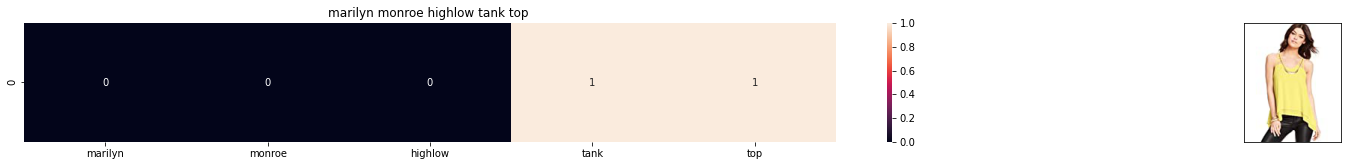

ASIN : B01M259QJD
Brand: marilyn monroe 
Title: marilyn monroe highlow tank top 
Euclidean similarity with the query image : 3.3166247903554
Average euclidean distance is  7.004348586590748


In [178]:
#call the bag-of-words model for a product to get similar products.
print('Getting the similar items for document id and number of items')
bag_of_words_model(56, 6)
# In the output heat map each value represents the count value 
# of the label word, the color represents the intersection
# with inputs title.

## 2.TF-IDF BASED PRODUCT SIMILARITY

In [75]:
tfidf_title_vectorizer = TfidfVectorizer(min_df = 0)
tfidf_title_features = tfidf_title_vectorizer.fit_transform(data['title'])
tf_idf_euclidean=[]
def tfidf_model(doc_id, num_results):

    L=[]
    pairwise_dist = pairwise_distances(tfidf_title_features,tfidf_title_features[doc_id])

    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    df_indices = list(data.index[indices])
    for i in range(0,len(indices)):
        L.append(data['asin'].loc[df_indices[i]])
    return L


In [76]:
tfidf_title_vectorizer = TfidfVectorizer(min_df = 0)
tfidf_title_features = tfidf_title_vectorizer.fit_transform(data['title'])
# tfidf_title_features.shape = #data_points * #words_in_corpus
# CountVectorizer().fit_transform(courpus) returns the a sparase matrix of dimensions #data_points * #words_in_corpus
# tfidf_title_features[doc_id, index_of_word_in_corpus] = tfidf values of the word in given doc
tf_idf_euclidean=[]
def tfidf_model(doc_id, num_results):
    # doc_id: apparel's id in given corpus
    
    # pairwise_dist will store the distance from given input apparel to all remaining apparels
    # the metric we used here is cosine, the coside distance is mesured as K(X, Y) = <X, Y> / (||X||*||Y||)
    # http://scikit-learn.org/stable/modules/metrics.html#cosine-similarity
    pairwise_dist = pairwise_distances(tfidf_title_features,tfidf_title_features[doc_id])

    # np.argsort will return indices of 9 smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the 9 smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    #data frame indices of the 9 smallest distace's
    df_indices = list(data.index[indices])

    for i in range(0,len(indices)):
        # we will pass 1. doc_id, 2. title1, 3. title2, url, model
        get_result(indices[i], data['title'].loc[df_indices[0]], data['title'].loc[df_indices[i]],data['medium_image_url'].loc[df_indices[i]], 'tfidf')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print('BRAND :',data['brand'].loc[df_indices[i]])
        tf_idf_euclidean.append(pdists[i])
        print ('Eucliden distance from the given image :', pdists[i])
        print('='*125)
    print('Average euclidean distance is',sum(tf_idf_euclidean)/num_results)


## 3. IDF BASED PRODUCT SIMILARITY

In [80]:
idf_title_vectorizer = CountVectorizer()
idf_title_features = idf_title_vectorizer.fit_transform(data['title'])

# idf_title_features.shape = #data_points * #words_in_corpus
# CountVectorizer().fit_transform(courpus) returns the a sparase matrix of dimensions #data_points * #words_in_corpus
# idf_title_features[doc_id, index_of_word_in_corpus] = number of times the word occured in that doc

In [81]:
def n_containing(word):
    # return the number of documents which had the given word
    return sum(1 for blob in data['title'] if word in blob.split())

def idf(word):
    # idf = log(#number of docs / #number of docs which had the given word)
    return math.log(data.shape[0] / (n_containing(word)))

In [83]:
idf_euclidean=[]
def idf_model(doc_id, num_results):
    # doc_id: apparel's id in given corpus
    
    # pairwise_dist will store the distance from given input apparel to all remaining apparels
    # the metric we used here is cosine, the coside distance is mesured as K(X, Y) = <X, Y> / (||X||*||Y||)
    pairwise_dist = pairwise_distances(idf_title_features,idf_title_features[doc_id])

    # np.argsort will return indices of 9 smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the 9 smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    #data frame indices of the 9 smallest distace's
    df_indices = list(data.index[indices])

    for i in range(0,len(indices)):
        get_result(indices[i],data['title'].loc[df_indices[0]], data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], 'idf')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print('Brand :',data['brand'].loc[df_indices[i]])
        idf_euclidean.append(pdists[i])
        print ('euclidean distance from the given image :', pdists[i])
        print('='*125)
    print('Average euclidean distance is ',sum(idf_euclidean)/num_results)

In [ ]:
idf_model(0,5)

## 4. KNN BASED PRODUCT SIMILARITY

In [64]:
import numpy as np
import pandas as pd 
from sklearn.neighbors import NearestNeighbors

In [65]:
df.columns

Index(['id', 'index', 'asin', 'brand', 'color', 'medium_image_url',
       'product_type_name', 'title', 'formatted_price', 'digital'],
      dtype='object')

In [66]:
sparse_matrix_products = df[["color","brand","product_type_name","formatted_price"]]

In [67]:
sparse_matrix_products["normalized_price"]=(sparse_matrix_products["formatted_price"]-sparse_matrix_products["formatted_price"].min())/(sparse_matrix_products["formatted_price"].max()-sparse_matrix_products["formatted_price"].min())

In [68]:
sparse_matrix_products["normalized_price"].describe()

count    16315.000000
mean         0.034747
std          0.047163
min          0.000000
25%          0.012377
50%          0.020081
75%          0.036724
max          1.000000
Name: normalized_price, dtype: float64

In [69]:
sparse_matrix_products.drop("formatted_price",axis=1,inplace=True)

In [70]:
sparse_matrix_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16315 entries, 0 to 16314
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   color              16315 non-null  object 
 1   brand              16315 non-null  object 
 2   product_type_name  16315 non-null  object 
 3   normalized_price   16315 non-null  float64
dtypes: float64(1), object(3)
memory usage: 510.0+ KB


In [71]:
sparse_matrix_products = pd.get_dummies(sparse_matrix_products)

In [72]:
model = NearestNeighbors(n_neighbors=15,
                         metric='cosine',
                         algorithm='brute',
                         n_jobs=-1)
model.fit(sparse_matrix_products)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=15)

In [83]:
import pickle 

# Its important to use binary mode 
knnPickle = open('knnpickle_file', 'wb') 

# source, destination 
pickle.dump(model, knnPickle)                      


In [84]:

# load the model from disk
loaded_model = pickle.load(open('knnpickle_file', 'rb'))

distances,indices=loaded_model.kneighbors(sparse_matrix_products.iloc[query_index,:].values.reshape(1,-1))

In [88]:
#query_index=np.random.choice(ddx.shape[0])
query_index=58
#print(ddx.iloc[query_index,:])
#print("Distances -->",distances," Indices -->",indices)

distances,indices=model.kneighbors(sparse_matrix_products.iloc[query_index,:].values.reshape(1,-1))

print(len(distances.flatten()))
M=[]
D=[]
for i in range(0,10):
    if i==0:
        print("Recommendation for {0}:\n".format(sparse_matrix_products.index[query_index]))
    else:
        M.append(sparse_matrix_products.index[indices.flatten()[i]])
        D.append(distances.flatten()[i])
        print("{0}: {1}, with distance of {2}".format(i,sparse_matrix_products.index[indices.flatten()[i]],distances.flatten()[i]))
 

15
Recommendation for 3:

1: 63, with distance of 1.0881428765818768e-05
2: 216, with distance of 1.0908512877327858e-05
3: 220, with distance of 1.375646299683897e-05
4: 11, with distance of 3.322765703517305e-05
5: 15293, with distance of 0.3333265765983723
6: 13613, with distance of 0.33332657683404643
7: 12644, with distance of 0.3333265771033882
8: 13526, with distance of 0.3333265771033882
9: 11000, with distance of 0.3333265771033882


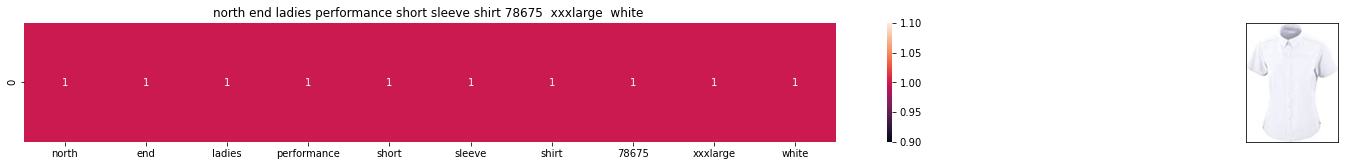

ASIN : B00IKF5OP8
Brand: north end sport red 
Color: white
Price: 34.35
Title: north end ladies performance short sleeve shirt 78675  xxxlarge  white 
La distance est : 0.3332604877896167


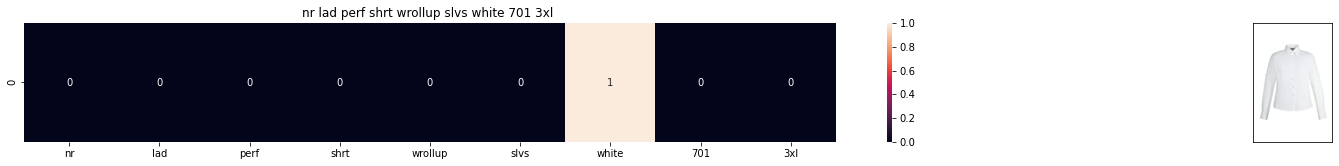

ASIN : B00N9JDGVE
Brand: ash city  north end sport red 
Color: white
Price: 33.93
Title: nr lad perf shrt wrollup slvs white 701 3xl 
La distance est : 0.33326049297132077


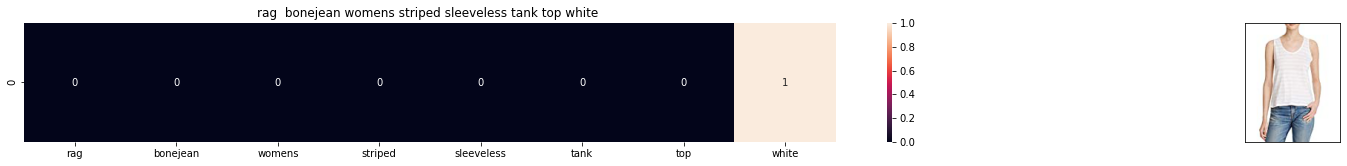

ASIN : B06XRKP3FB
Brand: rag  bone 
Color: white
Price: 34.99
Title: rag  bonejean womens striped sleeveless tank top white 
La distance est : 0.33326055597968496


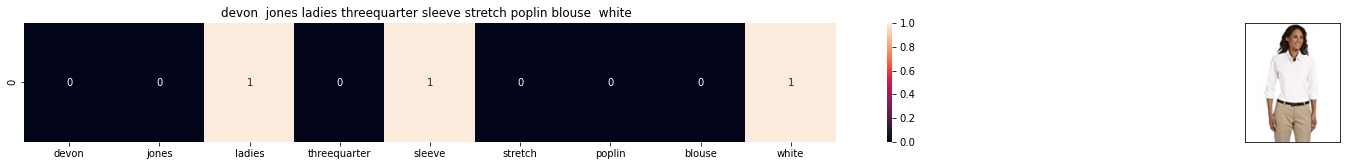

ASIN : B00MX7ZRZQ
Brand: devon  jones 
Color: white
Price: 33.09
Title: devon  jones ladies threequarter sleeve stretch poplin blouse  white  
La distance est : 0.33326062204481943


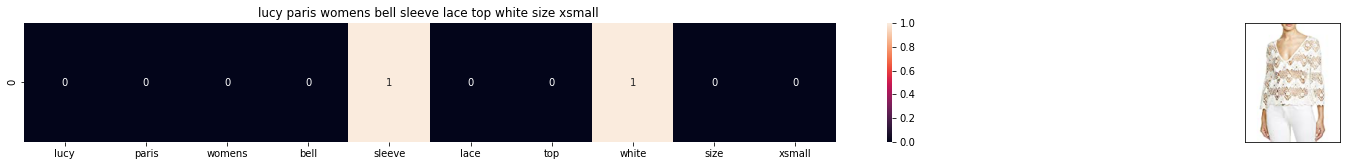

ASIN : B071V97XRV
Brand: lucy paris 
Color: white
Price: 36.59
Title: lucy paris womens bell sleeve lace top white size xsmall 
La distance est : 0.33326112839318656


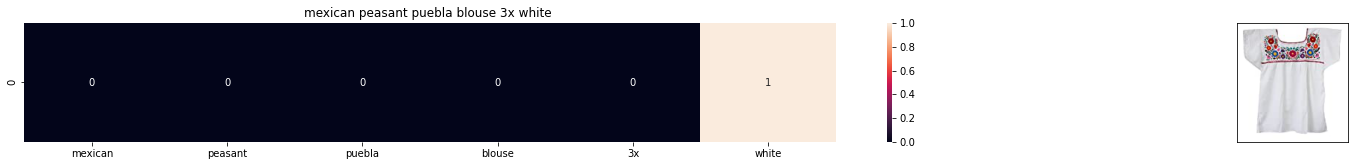

ASIN : B00DT91Y5E
Brand: leos imports 
Color: white
Price: 30.99
Title: mexican peasant puebla blouse 3x white 
La distance est : 0.333261637255041


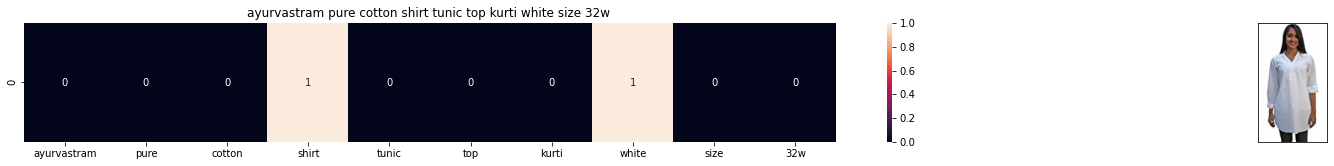

ASIN : B00F08C6BS
Brand: ayurvastram 
Color: white
Price: 37.99
Title: ayurvastram pure cotton shirt tunic top kurti white size 32w 
La distance est : 0.33326210023394254


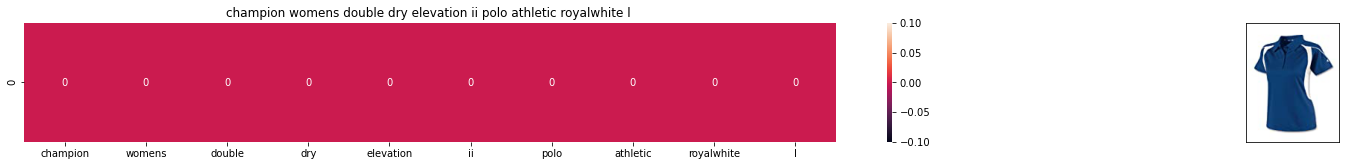

ASIN : B00506ZI56
Brand: champion 
Color: white
Price: 30.35
Title: champion womens double dry elevation ii polo athletic royalwhite l 
La distance est : 0.333262143365308


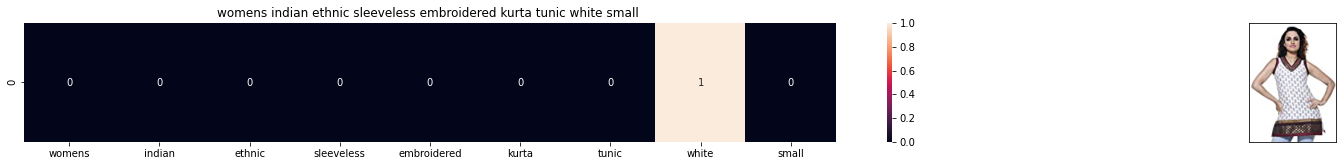

ASIN : B0096HR11O
Brand: insattva colors 
Color: white
Price: 29.99
Title: womens indian ethnic sleeveless embroidered kurta tunic white small 
La distance est : 0.33326246843839546


In [207]:
for i in range(0,len(M)):
    get_result(M[i],df['title'].loc[M[0]], df['title'].loc[M[i]], df['medium_image_url'].loc[M[i]], 'bag_of_words')
    print('ASIN :',df['asin'].loc[M[i]])
    print ('Brand:', df['brand'].loc[M[i]])
    print ('Color:', df['color'].loc[M[i]])
    print ('Price:', df['formatted_price'].loc[M[i]])
    print ('Title:', df['title'].loc[M[i]])
    print ("La distance est :", D[i])
    print('='*60)



### Comparing the models

In [150]:
euclidean_distance=[]
num_results=20
euclidean_distance.append(sum(bag_of_words_euclidean)/num_results)
euclidean_distance.append(sum(tf_idf_euclidean)/num_results)
euclidean_distance.append(sum(idf_euclidean)/num_results)
x=euclidean_distance
y=[]
for i in range(0,47,3):
    y.append(i)

euclidean_distance

[2.3282999821274517, 0.5128102298614877, 2.8646583938978116]

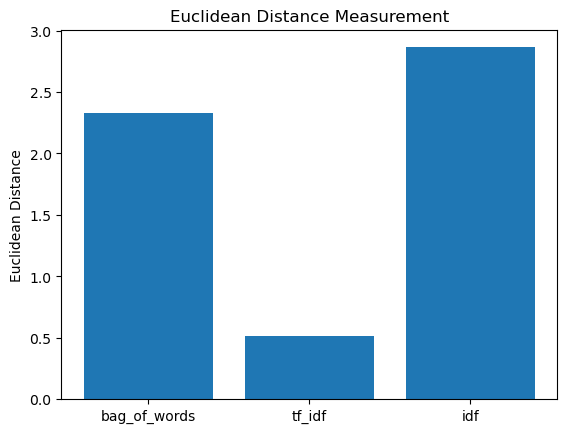

In [158]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
objects = ('bag_of_words', 'tf_idf', 'idf')
y_pos = np.arange(len(objects))
plt.bar(objects,x)
plt.ylabel('Euclidean Distance')
plt.title('Euclidean Distance Measurement')
plt.savefig('Comparaison des modeles.png')
plt.show()